In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Cargar el dataset saltar la fila 1
df = pd.read_csv("exchange-rates_and.csv", skiprows=1)
#verificar su carga
df.head()

,#country+code,#date+start,#date+end,Unnamed: 3,Unnamed: 4,#country+name,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,#date+year,Unnamed: 12,Unnamed: 13,#indicator+type,#indicator+value+num,Unnamed: 16
0,AND,1999-01-01,1999-12-31,6,'020,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,1999,7021,Annual value,NaN,0.938627,X
1,AND,1999-01-01,1999-01-31,6,'020,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,1999,7001,January,NaN,0.861490,X
2,AND,1999-02-01,1999-02-28,6,'020,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,1999,7002,February,NaN,0.892248,X
3,AND,1999-03-01,1999-03-31,6,'020,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,1999,7003,March,NaN,0.918868,X
4,AND,1999-04-01,1999-04-30,6,'020,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,1999,7004,April,NaN,0.934194,X


In [5]:
#Primero cambiaremos los nombre d elas columnas para un mejor entendimiento
df.columns = [
    "country_code", "date_start", "date_end", "unknown_1", "unknown_2", 
    "country_name", "indicator_code", "indicator_name", "currency", 
    "currency_name", "unknown_3", "year", "unknown_4","month", "indicator_type", "indicator_value", "unknown_5"
]
#verificar cambios
df.head()

,country_code,date_start,date_end,unknown_1,unknown_2,country_name,indicator_code,indicator_name,currency,currency_name,unknown_3,year,unknown_4,month,indicator_type,indicator_value,unknown_5
0,AND,1999-01-01,1999-12-31,6,'020,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,1999,7021,Annual value,NaN,0.938627,X
1,AND,1999-01-01,1999-01-31,6,'020,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,1999,7001,January,NaN,0.861490,X
2,AND,1999-02-01,1999-02-28,6,'020,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,1999,7002,February,NaN,0.892248,X
3,AND,1999-03-01,1999-03-31,6,'020,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,1999,7003,March,NaN,0.918868,X
4,AND,1999-04-01,1999-04-30,6,'020,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,1999,7004,April,NaN,0.934194,X


In [6]:
#Ahora eliminare las columnas innecesarias 
df = df.drop(columns=["unknown_1", "unknown_2", "unknown_3", "unknown_4", "unknown_5", "indicator_type"])
#verificaré cambios
df.head()

,country_code,date_start,date_end,country_name,indicator_code,indicator_name,currency,currency_name,year,month,indicator_value
0,AND,1999-01-01,1999-12-31,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,Annual value,0.938627
1,AND,1999-01-01,1999-01-31,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,January,0.861490
2,AND,1999-02-01,1999-02-28,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,February,0.892248
3,AND,1999-03-01,1999-03-31,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,March,0.918868
4,AND,1999-04-01,1999-04-30,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,April,0.934194


CONVERSIÓN DE DATOS

In [7]:
# Convertir fechas a tipo datetime
df["date_start"] = pd.to_datetime(df["date_start"])
df["date_end"] = pd.to_datetime(df["date_end"])

# Convertir el año a tipo entero
df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")

# Convertir el valor del indicador a tipo numérico
df["indicator_value"] = pd.to_numeric(df["indicator_value"], errors="coerce")

In [8]:
#Verificar Valores nulos
print(df.isnull().sum())

country_code       0
date_start         0
date_end           0
country_name       0
indicator_code     0
indicator_name     0
currency           0
currency_name      0
year               0
month              0
indicator_value    0
dtype: int64


In [9]:
#Como no hay valores nulos procedemos a guardar el archivo limpio y la filtración de datos 
df.to_csv("exchange_rate_and_clean.csv", index=False)

EJERCICIOS
- Crea una nueva columna Tipo que indique si el valor es mensual o anual, usando la columna Months.

- Filtra los valores mensuales (Tipo == "January", "February", ...).

- Calcula el tipo de cambio promedio por año.

- Calcula la diferencia de tipo de cambio entre cada mes (diferencia mes a mes).

- Visualiza los tipos de cambio con un gráfico de línea para un año específico (por ejemplo, 2005).

In [14]:
# Crear una nueva columna 'Tipo' que indique si el valor es mensual o anual
df['Tipo'] = np.where(df['month'] == 'Annual value', 'Anual', 'Mensual')
#verificar cambios
df.head()

,country_code,date_start,date_end,country_name,indicator_code,indicator_name,currency,currency_name,year,month,indicator_value,Tipo
0,AND,1999-01-01,1999-12-31,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,Annual value,0.938627,Anual
1,AND,1999-01-01,1999-01-31,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,January,0.861490,Mensual
2,AND,1999-02-01,1999-02-28,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,February,0.892248,Mensual
3,AND,1999-03-01,1999-03-31,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,March,0.918868,Mensual
4,AND,1999-04-01,1999-04-30,Andorra,LCU,Local currency units per USD,EUR,Euro,1999,April,0.934194,Mensual


In [15]:
# Filtrar los valores mensuales
df_mensual = df[df['Tipo'] == 'Mensual']

In [16]:
# Calcular el tipo de cambio promedio por año
promedio_anual = df_mensual.groupby('year')['indicator_value'].mean()
print(f"El tipo de cambio promedio por año es:\n{promedio_anual}")

El tipo de cambio promedio por año es:
year
1999    0.938589
2000    1.085180
2001    1.117299
2002    1.061627
2003    0.885822
2004    0.805118
2005    0.804610
2006    0.797096
2007    0.730631
2008    0.683300
2009    0.719596
2010    0.755095
2011    0.719200
2012    0.778274
2013    0.753169
2014    0.753729
2015    0.901659
2016    0.904044
2017    0.887298
2018    0.847160
2019    0.893288
2020    0.877475
2021    0.845377
2022    0.950916
2023    0.924710
2024    0.922487
Name: indicator_value, dtype: float64


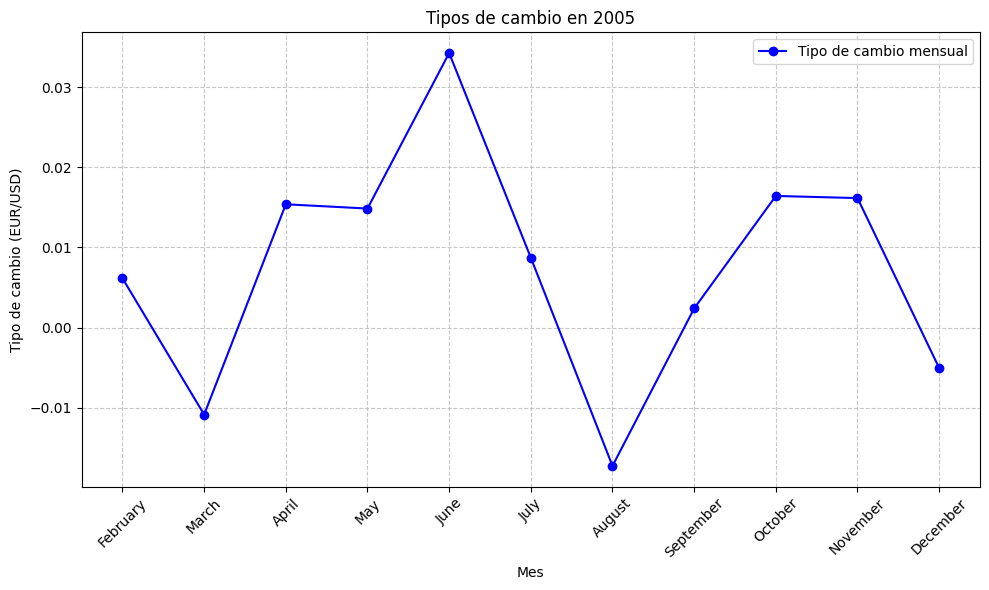

In [22]:
# Visualizar los tipos de cambio con un gráfico de línea para un año específico (por ejemplo, 2005)
df_2005 = df_mensual[df_mensual['year'] == 2005]

plt.figure(figsize=(10, 6))
plt.plot(df_2005['month'], df_2005['indicator_value'], marker='o', color='b', linestyle='-', label='Tipo de cambio mensual')
plt.title('Tipos de cambio en 2005')
plt.xlabel('Mes')
plt.ylabel('Tipo de cambio (EUR/USD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()